# 1. Install Dependencies and Setup

In [45]:
pip install tensorflow  opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [46]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in d:\imageclassification\imageclasskernel\lib\site-packages (1.0.2)
Requirement already up-to-date: scipy in d:\imageclassification\imageclasskernel\lib\site-packages (1.7.3)
Requirement already up-to-date: matplotlib in d:\imageclassification\imageclasskernel\lib\site-packages (3.5.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [47]:
!pip install seaborn

You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


In [48]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
cycler                       0.11.0
debugpy                      1.7.0
decorator                    5.1.1
entrypoints                  0.4
flatbuffers                  23.5.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.25.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.8.0
idna                         3.6
importlib-metadata           6.7.0
ipykernel                    6.16.2
ipython                      7.34.0
jedi                         0.19.1
joblib                       1.3.2


You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


In [49]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [50]:
import cv2
import imghdr

In [54]:
data_dir = 'D:\ImageClassification\data' 

In [55]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [57]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [73]:
import numpy as np 

Found 13173 files belonging to 12 classes.


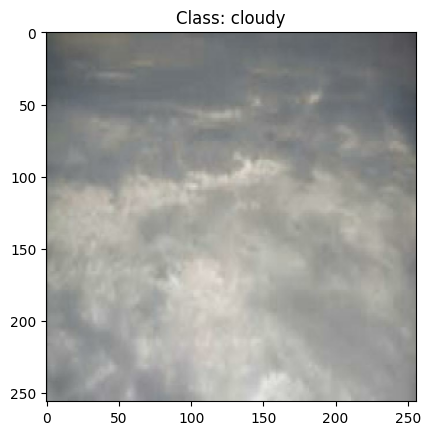

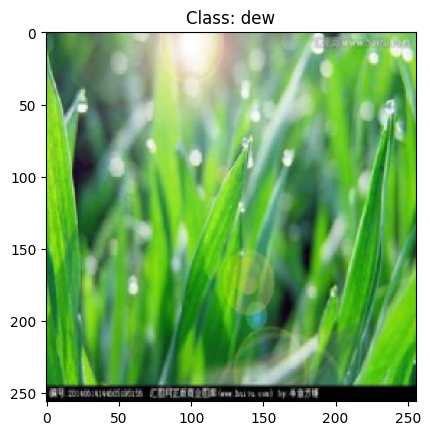

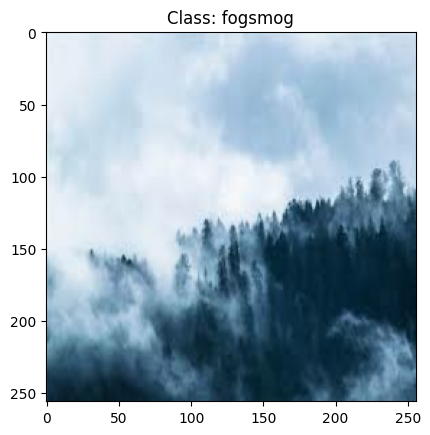

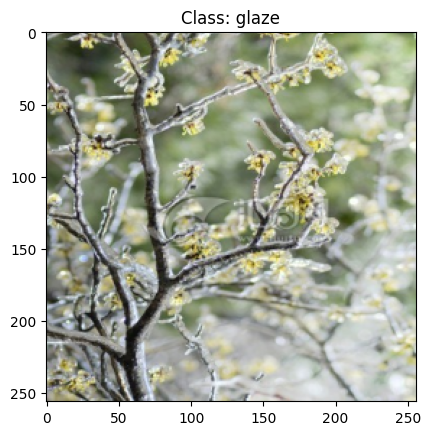

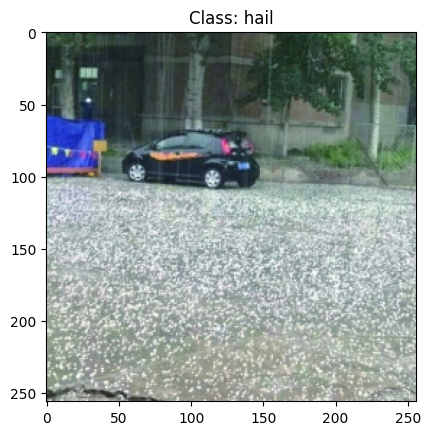

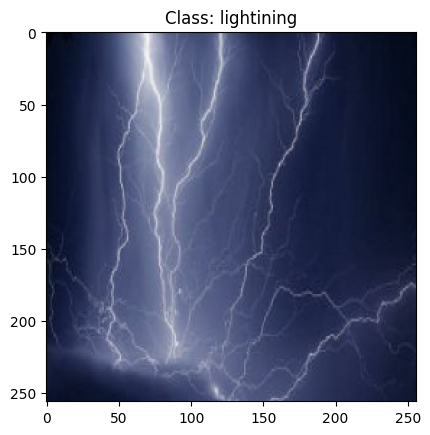

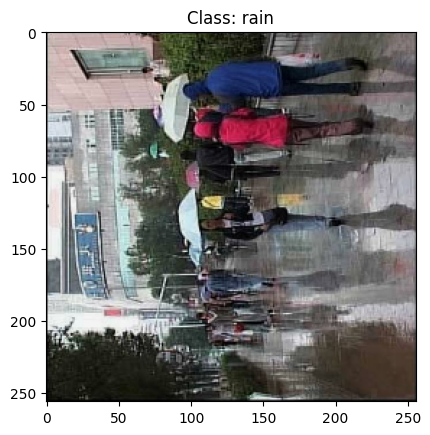

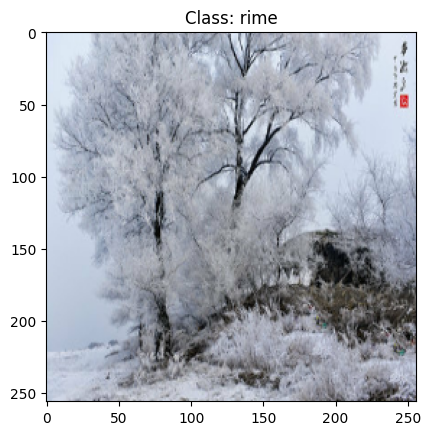

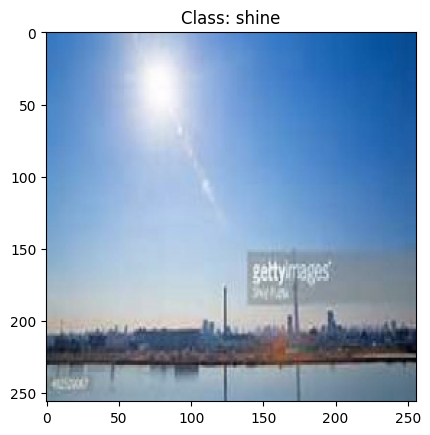

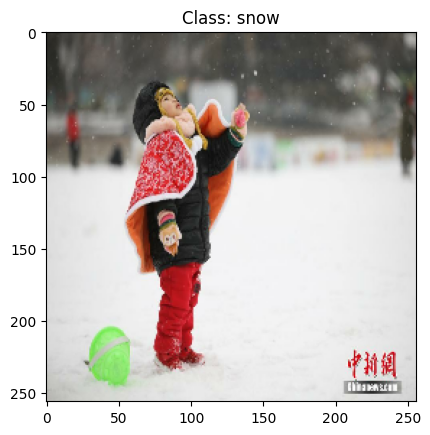

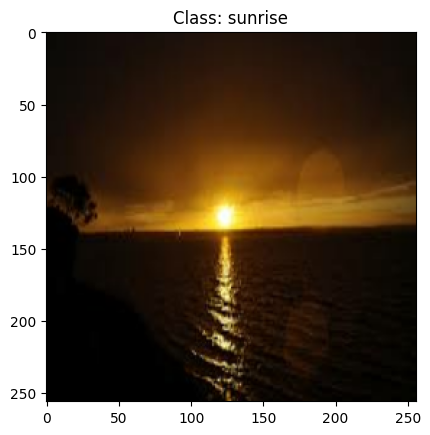

In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt

data_dir = 'D:\ImageClassification\data'
class_labels = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime','shine', 'snow', 'sunrise']

# Veri kümesini oluştur
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Veri kümesinin bir örnek batch'ini alma
batch = next(iter(data))

# Batch içindeki görüntüler ve etiketler
images, labels = batch

# Her bir sınıf için ilk görüntüyü gösterme
for class_index, class_label in enumerate(class_labels):
    class_indices = tf.where(labels == class_index).numpy().flatten()
    if len(class_indices) > 0:
        image_for_class = images[class_indices[0]]
        plt.imshow(image_for_class.numpy().astype(int))
        plt.title(f'Class: {class_label}')
        plt.show()


In [80]:
data_iterator = data.as_numpy_iterator()

In [81]:
batch = data_iterator.next()

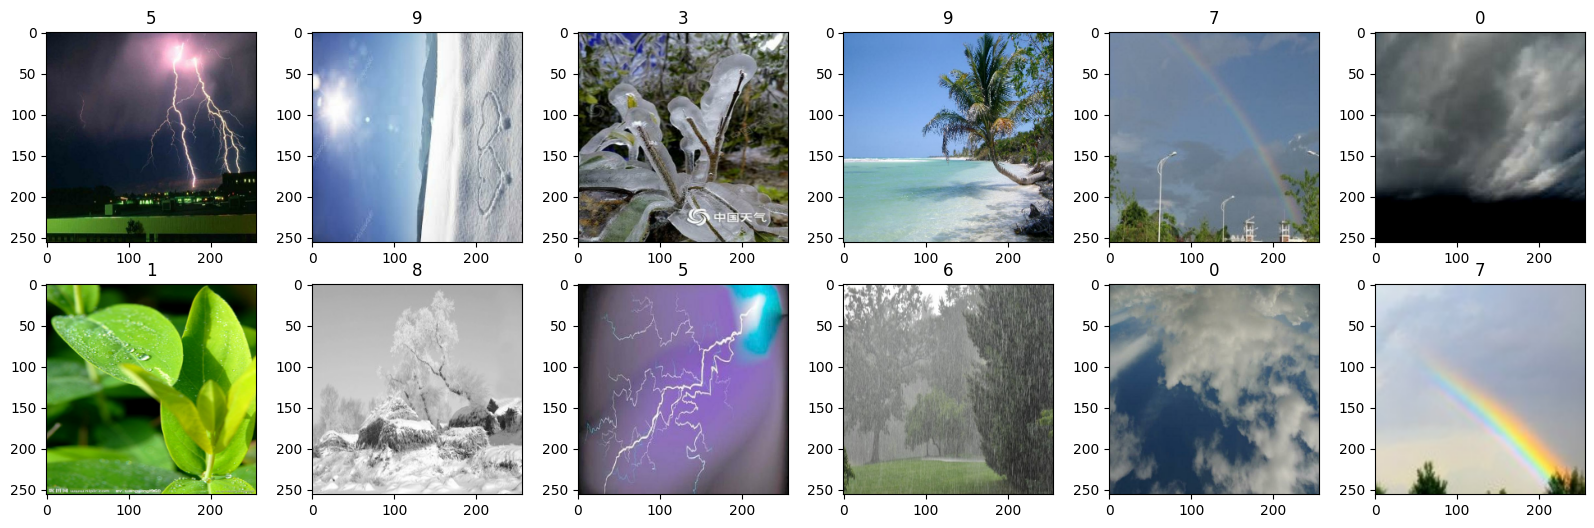

In [82]:
#2 satır 6 sütün şeklinde rastgele 12 veriyi gösterme
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))

# Veri kümesinden 12 resmi gösterme
for i in range(2):
    for j in range(6):
        img_index = i * 6 + j
        if img_index < 12:
            ax[i, j].imshow(batch[0][img_index].astype(int))
            ax[i, j].title.set_text(batch[1][img_index])

plt.show()


# 4. Scale Data

In [83]:
from tensorflow.keras.utils import to_categorical

In [84]:
# Veri setini normalize etme ve one-hot encoding uygulama
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, depth=12)))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


# 5. Split Data

In [85]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [86]:
print(train_size)
print(val_size)
print(test_size)

288
82
41


In [87]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [88]:
from collections import Counter
class_labels = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightining', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Train setindeki sınıfların örnek sayıları
train_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in train])

# Test setindeki sınıfların örnek sayıları
test_class_counts = Counter([class_labels[np.argmax(label.numpy())] for _, label in test])

print("Train seti sınıf örnek sayıları:")
print(train_class_counts)

print("\nTest seti sınıf örnek sayıları:")
print(test_class_counts)


Train seti sınıf örnek sayıları:
Counter({'cloudy': 31, 'dew': 30, 'rime': 29, 'snow': 28, 'rain': 27, 'lightining': 27, 'sunrise': 27, 'hail': 26, 'rainbow': 20, 'shine': 18, 'fogsmog': 15, 'glaze': 10})

Test seti sınıf örnek sayıları:
Counter({'cloudy': 6, 'rime': 5, 'dew': 5, 'fogsmog': 5, 'lightining': 4, 'shine': 4, 'hail': 3, 'sunrise': 3, 'rain': 2, 'snow': 2, 'glaze': 1, 'rainbow': 1})


# 6. Build Deep Learning Model

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [90]:
num_classes = 12 # Toplam sınıf sayısı


In [91]:
input_shape = (256, 256, 3)
num_classes = 12

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Convolutional Block 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Convolutional Block 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Convolutional Block 4
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Convolutional Block 5
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                      

In [92]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# 7. Train

In [94]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
logdir='logs'

In [96]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [97]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
hist = model.fit(train, epochs=50, validation_data=val,  callbacks=[tensorboard_callback, early_stopping])

Epoch 1/50
288/288 [==============================] - 711s 2s/step - loss: 3.8228 - accuracy: 0.3677 - val_loss: 1.7836 - val_accuracy: 0.4386
Epoch 2/50
288/288 [==============================] - 721s 3s/step - loss: 1.7103 - accuracy: 0.4670 - val_loss: 3.1949 - val_accuracy: 0.3308
Epoch 3/50
288/288 [==============================] - 730s 3s/step - loss: 1.7283 - accuracy: 0.4750 - val_loss: 1.6934 - val_accuracy: 0.5130
Epoch 4/50
288/288 [==============================] - 716s 2s/step - loss: 1.8027 - accuracy: 0.4972 - val_loss: 2.2303 - val_accuracy: 0.4139
Epoch 5/50
288/288 [==============================] - 712s 2s/step - loss: 1.7781 - accuracy: 0.4926 - val_loss: 2.8580 - val_accuracy: 0.3533
Epoch 6/50
288/288 [==============================] - 707s 2s/step - loss: 1.6611 - accuracy: 0.5203 - val_loss: 3.1616 - val_accuracy: 0.3289
Epoch 7/50
288/288 [==============================] - 715s 2s/step - loss: 1.5775 - accuracy: 0.5474 - val_loss: 1.4330 - val_accuracy: 0.5236

In [38]:
from keras.callbacks import TensorBoard
import time
kerasboard = TensorBoard(log_dir="/tmp/tensorboard/{}".format(time),
                        batch_size=32,
                        histogram_freq=1,
                        write_grads=True)

In [39]:
print("tensorboard --logdir="+kerasboard.log_dir)

tensorboard --logdir=/tmp/tensorboard/<module 'time' (built-in)>


# 8. Plot Performance

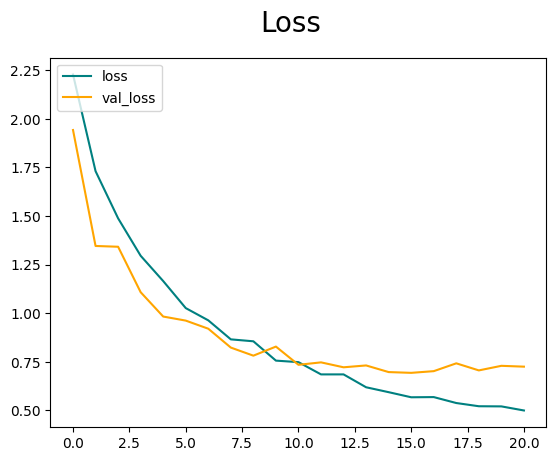

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

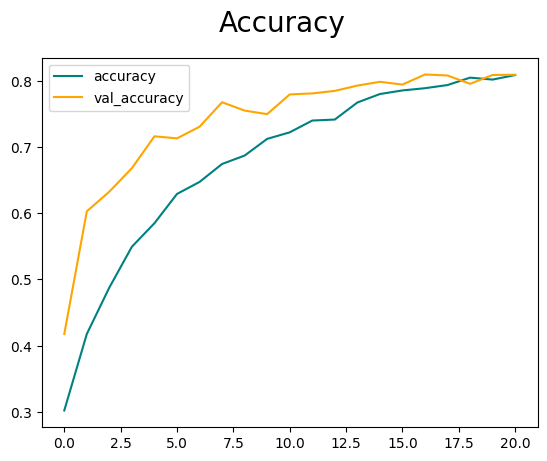

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [25]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy,Accuracy
from tensorflow.keras.utils import to_categorical

In [65]:
model.load_weights('D:\ImageClassification\models\yeni.h5')

In [66]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Reset states to clear previous values
pre.reset_states()
re.reset_states()
acc.reset_states()

# Evaluate the model on the validation dataset
for inputs, targets in val:
    predictions = model(inputs)
    pre.update_state(targets, predictions)
    re.update_state(targets, predictions)
    acc.update_state(targets, predictions)

# Get the final values
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
accuracy_value = acc.result().numpy()

# Print the values
print(f'Precision: {precision_value}')
print(f'Recall: {recall_value}')
print(f'Categorical Accuracy: {accuracy_value}')

Precision: 0.8389900922775269
Recall: 0.7724847793579102
Categorical Accuracy: 0.7945883870124817


In [64]:
num_classes =12
precisions = [Precision() for _ in range(num_classes)]
recalls = [Recall() for _ in range(num_classes)]
accuracies = [CategoricalAccuracy() for _ in range(num_classes)]
f1_scores = []
# Reset states to clear previous values
for metric in precisions + recalls + accuracies:
    metric.reset_states()

# Evaluate the model on the validation dataset
for inputs, targets in val:
    predictions = model(inputs)

    # Update metrics for each class
    for i in range(num_classes):
        precisions[i].update_state(targets[:, i], predictions[:, i])
        recalls[i].update_state(targets[:, i], predictions[:, i])
        accuracies[i].update_state(targets[:, i], predictions[:, i])

# Print the final values for each class
for i in range(num_classes):
    precision_value = precisions[i].result().numpy()
    recall_value = recalls[i].result().numpy()
    accuracy_value = accuracies[i].result().numpy()
    
    f1_score_value = 2 * (precision_value * recall_value) / (precision_value + recall_value + 1e-8)
    f1_scores.append(f1_score_value)


    print(f'Class {i + 1}: Precision: {precision_value}, Recall: {recall_value}, Accuracy: {accuracy_value}, F1 Score: {f1_score_value}')
    
# Calculate and print the overall F1 Score
overall_f1_score = sum(f1_scores) / num_classes
print(f'Overall F1 Score: {overall_f1_score}')

Class 1: Precision: 0.957198441028595, Recall: 0.9077490568161011, Accuracy: 0.39024388790130615, F1 Score: 0.9318181622942001
Class 2: Precision: 0.9837837815284729, Recall: 0.9191918969154358, Accuracy: 0.4878048896789551, F1 Score: 0.9503916335355223
Class 3: Precision: 0.970802903175354, Recall: 0.9109588861465454, Accuracy: 0.5121951103210449, F1 Score: 0.9399292788567672
Class 4: Precision: 0.9716981053352356, Recall: 0.8110235929489136, Accuracy: 0.5121951103210449, F1 Score: 0.8841201098899125
Class 5: Precision: 0.944915235042572, Recall: 0.899193525314331, Accuracy: 0.4146341383457184, F1 Score: 0.9214875331313116
Class 6: Precision: 0.9784946441650391, Recall: 0.9715302586555481, Accuracy: 0.353658527135849, F1 Score: 0.9750000469624251
Class 7: Precision: 0.9253731369972229, Recall: 0.8888888955116272, Accuracy: 0.31707316637039185, F1 Score: 0.9067641976671803
Class 8: Precision: 0.904411792755127, Recall: 0.7235293984413147, Accuracy: 0.39024388790130615, F1 Score: 0.8039

In [30]:
test = data.skip(train_size + val_size).take(test_size)

In [31]:
accuracy_metric = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    accuracy_metric.update_state(tf.argmax(y, axis=1), tf.argmax(yhat, axis=1))


test_accuracy = accuracy_metric.result().numpy()
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 1s 669ms/step
Test Accuracy: 0.9123475551605225


# 10. Test

In [32]:
import matplotlib.pyplot as plt

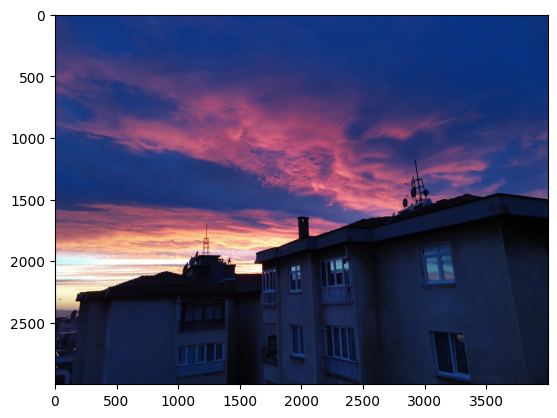

1/1 [==============================] - 0s 81ms/step
Predicted class indices: [5]
Predicted class: lightning
Probability for class cloudy: 0.10588832944631577
Probability for class dew: 0.011379975825548172
Probability for class fogsmog: 0.000748048594687134
Probability for class glaze: 0.0009410226484760642
Probability for class hail: 0.0018445285968482494
Probability for class lightning: 0.7479419708251953
Probability for class rain: 0.12493418157100677
Probability for class rainbow: 0.003482378553599119
Probability for class rime: 0.0005920588155277073
Probability for class shine: 0.0018089651130139828
Probability for class snow: 0.0002939159458037466
Probability for class sunrise: 0.00014461712271440774


In [67]:
# Görüntüyü okuma ve uygun formatta yükleme
img = cv2.imread('denemeVeri/my5.jpg')

# Görüntü boş mu kontrolü
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında okur, bu nedenle RGB'ye dönüştürüyoruz

    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()
else:
    print("Görüntü yüklenemedi.")
    

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256, 256))
    resize = np.expand_dims(resize / 255, 0)  

else:
    print(f"Error: Unable to read the image at {img_path}")
    
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']
predictions = model.predict(resize)
predicted_class = np.argmax(predictions, axis=-1)

# Print some debug information
print(f'Predicted class indices: {predicted_class}')
if 0 <= predicted_class[0] < len(class_names):
    predicted_class_label = class_names[predicted_class[0]]
    print(f'Predicted class: {predicted_class_label}')
else:
    print('Error: Predicted class index is out of range.')

# Print class probabilities
for i, prob in enumerate(predictions[0]):
    class_label = class_names[i]
    print(f'Probability for class {class_label}: {prob}')



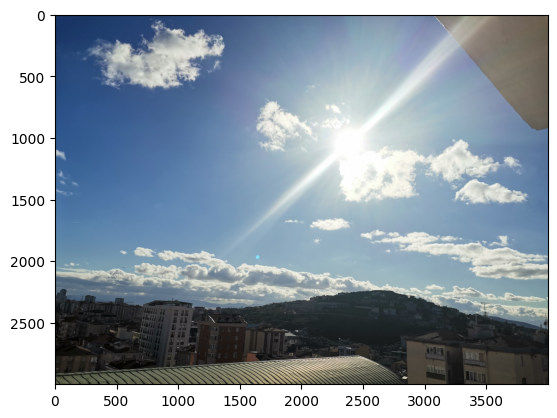

In [33]:
# Görüntüyü okuma ve uygun formatta yükleme
img = cv2.imread('denemeVeri/benimCektigim2.jpg')

# Görüntü boş mu kontrolü
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında okur, bu nedenle RGB'ye dönüştürüyoruz

    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()
else:
    print("Görüntü yüklenemedi.")

In [56]:
img_path = 'denemeVeri/my8.jpg'
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256, 256))
    resize = np.expand_dims(resize / 255, 0)  

else:
    print(f"Error: Unable to read the image at {img_path}")


In [57]:
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']
predictions = model.predict(resize)
predicted_class = np.argmax(predictions, axis=-1)

# Print some debug information
print(f'Predicted class indices: {predicted_class}')
if 0 <= predicted_class[0] < len(class_names):
    predicted_class_label = class_names[predicted_class[0]]
    print(f'Predicted class: {predicted_class_label}')
else:
    print('Error: Predicted class index is out of range.')

# Print class probabilities
for i, prob in enumerate(predictions[0]):
    class_label = class_names[i]
    print(f'Probability for class {class_label}: {prob}')


1/1 [==============================] - 0s 58ms/step
Predicted class indices: [5]
Predicted class: lightning
Probability for class cloudy: 0.08314605802297592
Probability for class dew: 3.366514647495933e-05
Probability for class fogsmog: 1.3355334886000492e-05
Probability for class glaze: 1.342786072200397e-05
Probability for class hail: 9.827243047766387e-05
Probability for class lightning: 0.8583049178123474
Probability for class rain: 0.05837825685739517
Probability for class rainbow: 1.046239776769653e-05
Probability for class rime: 6.938604357742406e-09
Probability for class shine: 2.906915774758545e-08
Probability for class snow: 3.329873834445607e-07
Probability for class sunrise: 1.3167068573238794e-06


# 11. Save the Model

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model.save(os.path.join('models','yeni.h5'))

In [99]:
new_model = load_model('D:\ImageClassification\models\yeni.h5')

# 12. Confusion Matrix

1/1 [==============================] - 0s 332ms/step


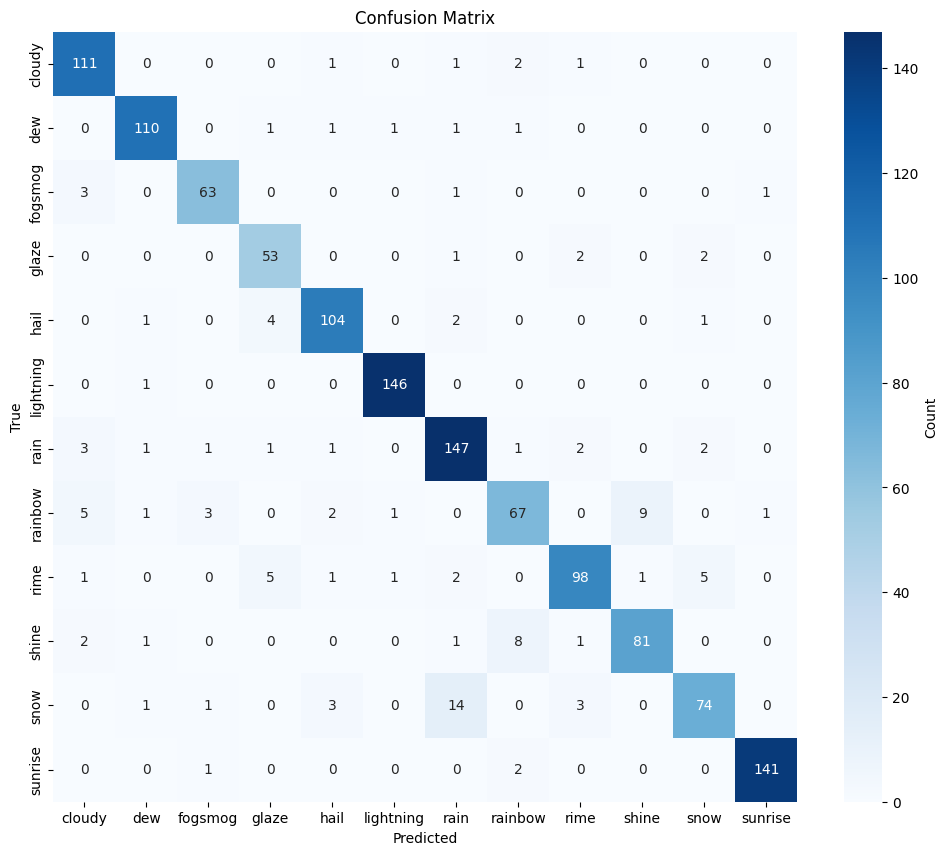

In [44]:
# Confusion Matrix oluşturma ve çizme
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Test veri seti üzerinde tahminlerin ve gerçek etiketlerin toplanması
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Sınıf indekslerini listeler içinde ekleyin
    y_true.append([np.argmax(label) for label in y])
    y_pred.append([np.argmax(pred) for pred in yhat])

# Listeleri numpy dizilerine çevirme
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Confusion Matrix oluşturma
conf_mat = confusion_matrix(y_true, y_pred)

# Sınıf isimleri
class_names = ['cloudy', 'dew', 'fogsmog', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Pandas DataFrame'e dönüştürme
conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

# Confusion Matrix'i çizme
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





# Realtime

In [110]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
import time

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
sequence_length = 1

# [10,1,224,224,3]-needed input shape
cap = cv2.VideoCapture(0)

#Time interval to be used for waiting (in seconds)
wait_interval = 0.1

#  Initialization of the previous prediction
previous_prediction = None

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Resize the frame to match the model's expected sizing
    resized_frame = cv2.resize(frame, (256, 256))

    # Preprocess the frame for the model
    input_data = preprocess_input(np.expand_dims(resized_frame, axis=0))

    # Update the sequence with the preprocessed frame
    sequence.append(input_data)

    # Process if the specified time interval is reached
    if len(sequence) == sequence_length:
        sequence = np.array(sequence)

        # Remove the singleton dimension
        sequence = np.squeeze(sequence, axis=1)

        # Doğrudan modeli çağırın ve tahmin alın
        res = model.predict(sequence)
        current_prediction = class_names[np.argmax(res)]

        # Eğer önceki tahminden farklıysa güncelle
        if current_prediction != previous_prediction:
            print(current_prediction)

        # Güncelleme yapıldıktan sonra ekrandaki etiketi güncelle
        sentence = [current_prediction]

        # Görsel olarak etiketi belirtmek için metni ayarla
        text = ' '.join(sentence)
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (10, 30)
        font_scale = 1
        coloqr = (0, 0, 255)  # Kırmızı renk (BGR formatında)
        thickness = 2
        frame = cv2.putText(frame, text, org, font, font_scale, color, thickness, cv2.LINE_AA)

        # Show the frame
        cv2.imshow('OpenCV Feed', frame)

        # Bekleme süresi kadar uyku
        time.sleep(wait_interval)

        # Reset the sequence for the next predictions
        sequence = []

        # Güncelleme yapıldıktan sonra önceki tahmini güncelle
        previous_prediction = current_prediction

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 63ms/step
sunrise
1/1 [==============================] - 0s 24ms/step
cloudy
1/1 [==============================] - 0s 21ms/step
fogsmog
1/1 [==============================] - 0s 21ms/step
lightning
1/1 [==============================] - 0s 23ms/step
fogsmog
1/1 [==============================] - 0s 23ms/step
lightning
1/1 [==============================] - 0s 21ms/step
fogsmog
1/1 [==============================] - 0s 26ms/step
cloudy
1/1 [==============================] - 0s 23ms/step
fogsmog
1/1 [==============================] - 0s 23ms/step
cloudy
1/1 [==============================] - 0s 23ms/step
lightning
1/1 [==============================] - 0s 23ms/step
fogsmog
1/1 [==============================] - 0s 23ms/step
lightning
1/1 [==============================] - 0s 22ms/step
fogsmog
1/1 [==============================] - 0s 24ms/step
cloudy
1/1 [==============================] - 0s 24ms/step
fogsmog
1/1 [==============================]